In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

root = "/Users/zyxu/Documents/py/FM_weights"
os.chdir(root)

## load

In [2]:
loaded_tensor = torch.load(f'{root}/output/4sets_intermediate_outputs.pth')
print(loaded_tensor.shape)

torch.Size([13, 256, 197, 192])


In [3]:
from utils import intermdiates_to_pos_ctx
res = intermdiates_to_pos_ctx(loaded_tensor, normalize = False)
res.keys()

mu.shape torch.Size([13, 192])
expanded_mu_pos:  torch.Size([13, 197, 192])
expanded_mu_ctx:  torch.Size([13, 256, 192])
expanded_pos: torch.Size([13, 256, 197, 192]), expanded_ctx: torch.Size([13, 256, 197, 192]), expanded_mu_whole: torch.Size([13, 256, 197, 192])
resid: torch.Size([13, 256, 197, 192])
cvec: torch.Size([13, 256, 197, 192])


dict_keys(['mu', 'pos', 'ctx', 'resid', 'cvec'])

In [4]:
res['pos'].shape

torch.Size([13, 197, 192])

In [15]:
res['cvec'].detach().shape

torch.Size([13, 256, 197, 192])

In [16]:
cvec = res['cvec']
cvec.shape
cvec[0, : 197].shape

torch.Size([197, 197, 192])

# start visz

### PCA

Layer progress: 100%|██████████| 12/12 [00:00<00:00, 59.83it/s]


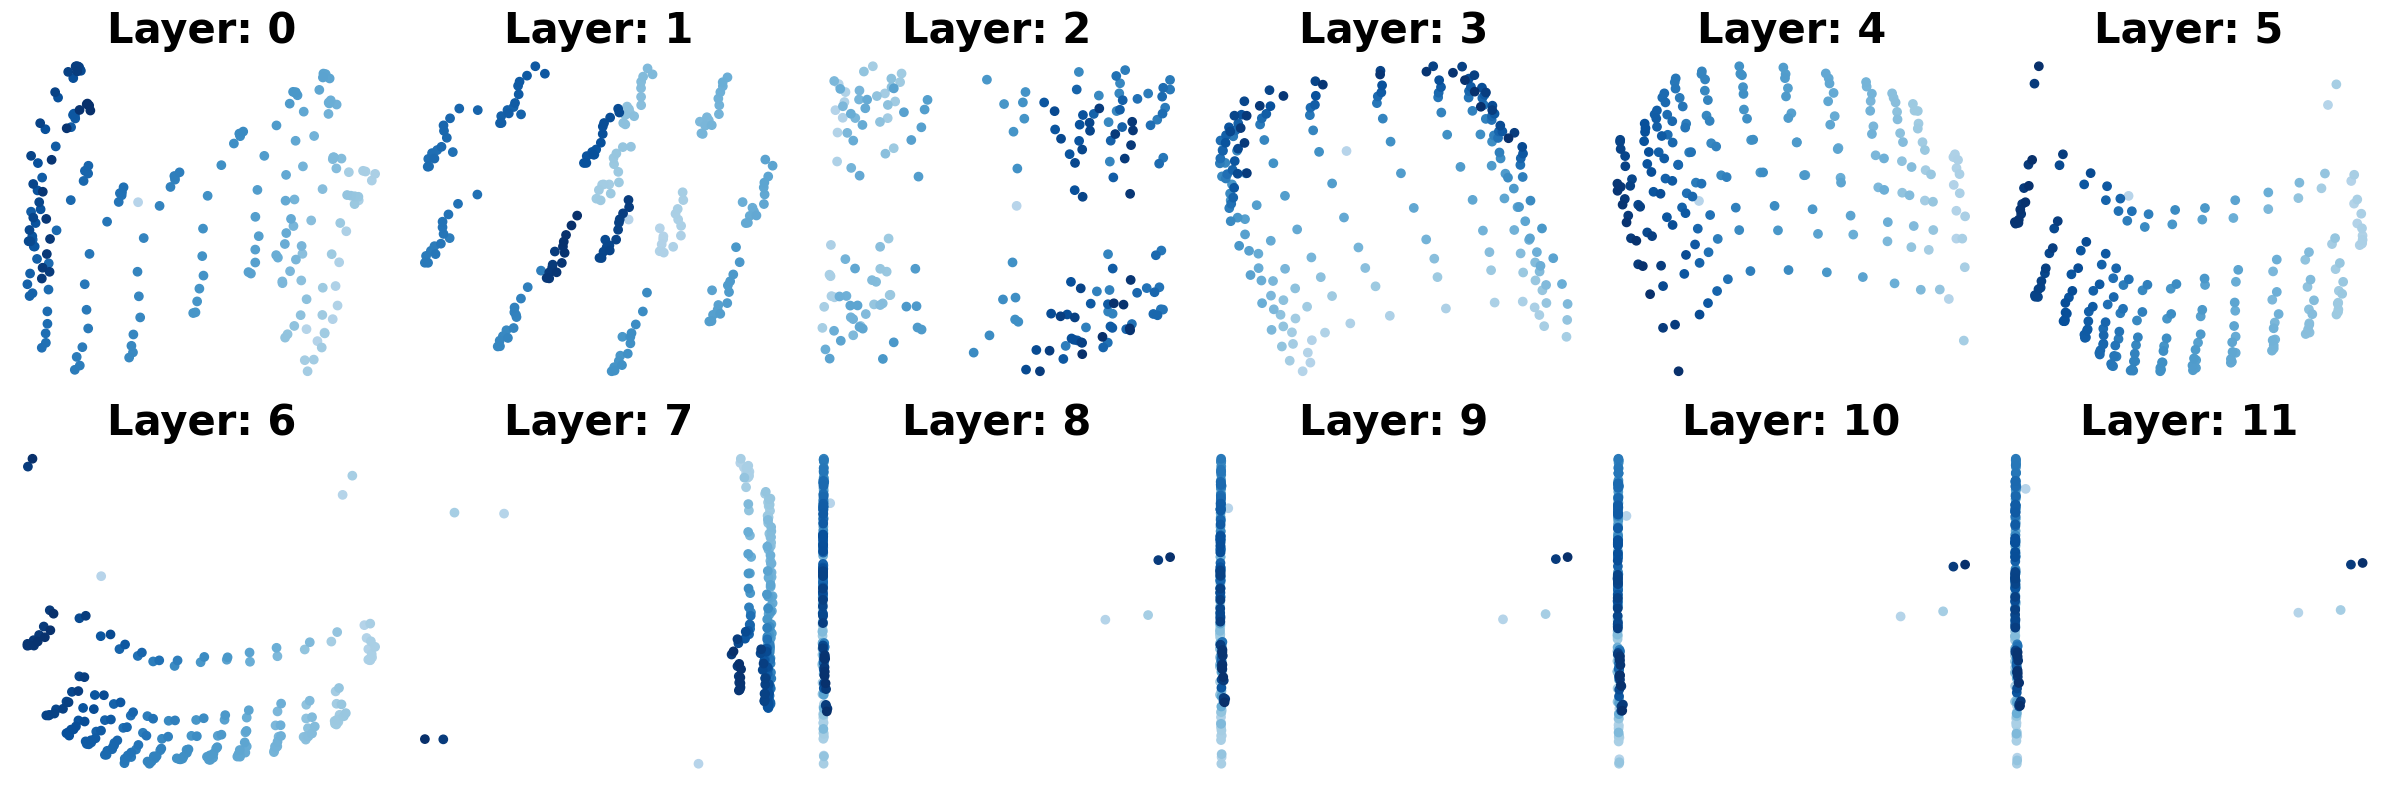

In [12]:
from utils import visz_pca_pos_cvec
visz_pca_pos_cvec.plot(res['pos'].detach(),res['cvec'].detach().view(13,-1,192), plot_context=False)

Layer progress: 100%|██████████| 12/12 [00:00<00:00, 24.56it/s]


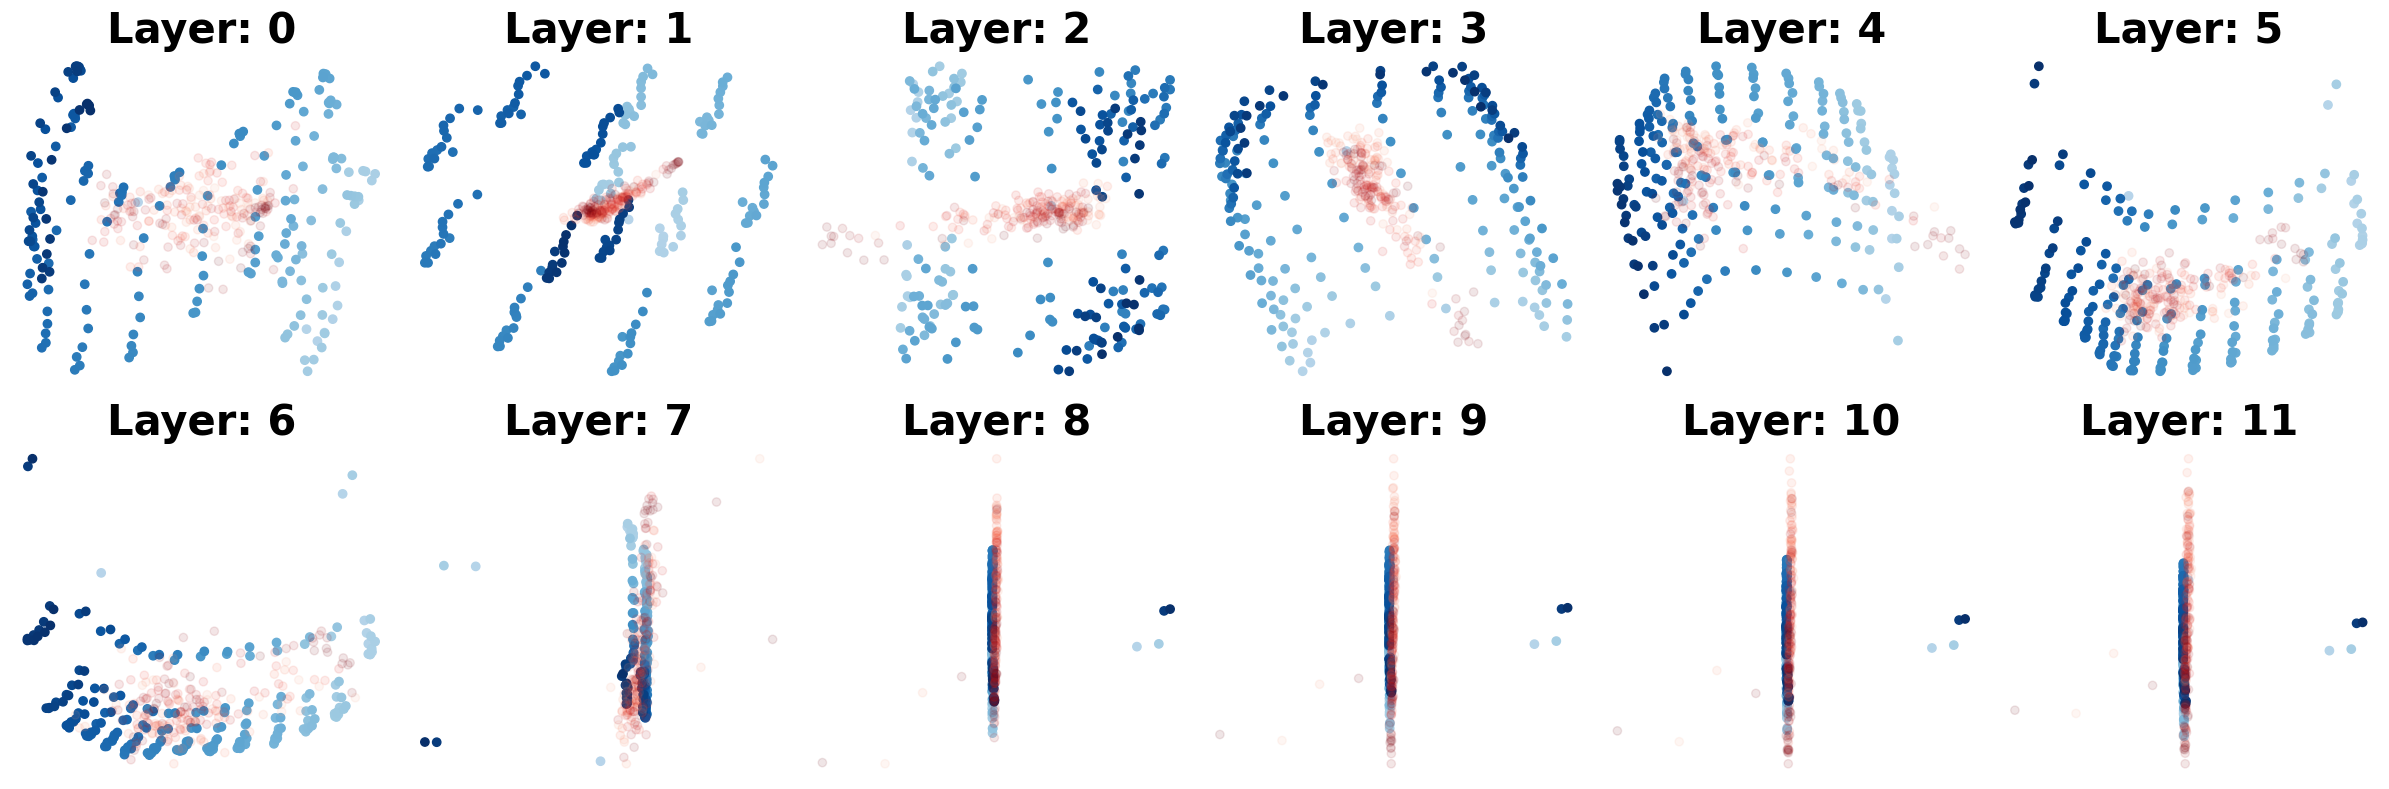

In [4]:
from utils import visz_pca_pos_cvec

visz_pca_pos_cvec.plot(res['pos'].detach(),res['cvec'].detach().view(13,-1,192), plot_context=True)

Layer progress: 100%|██████████| 12/12 [00:00<00:00, 36.08it/s]


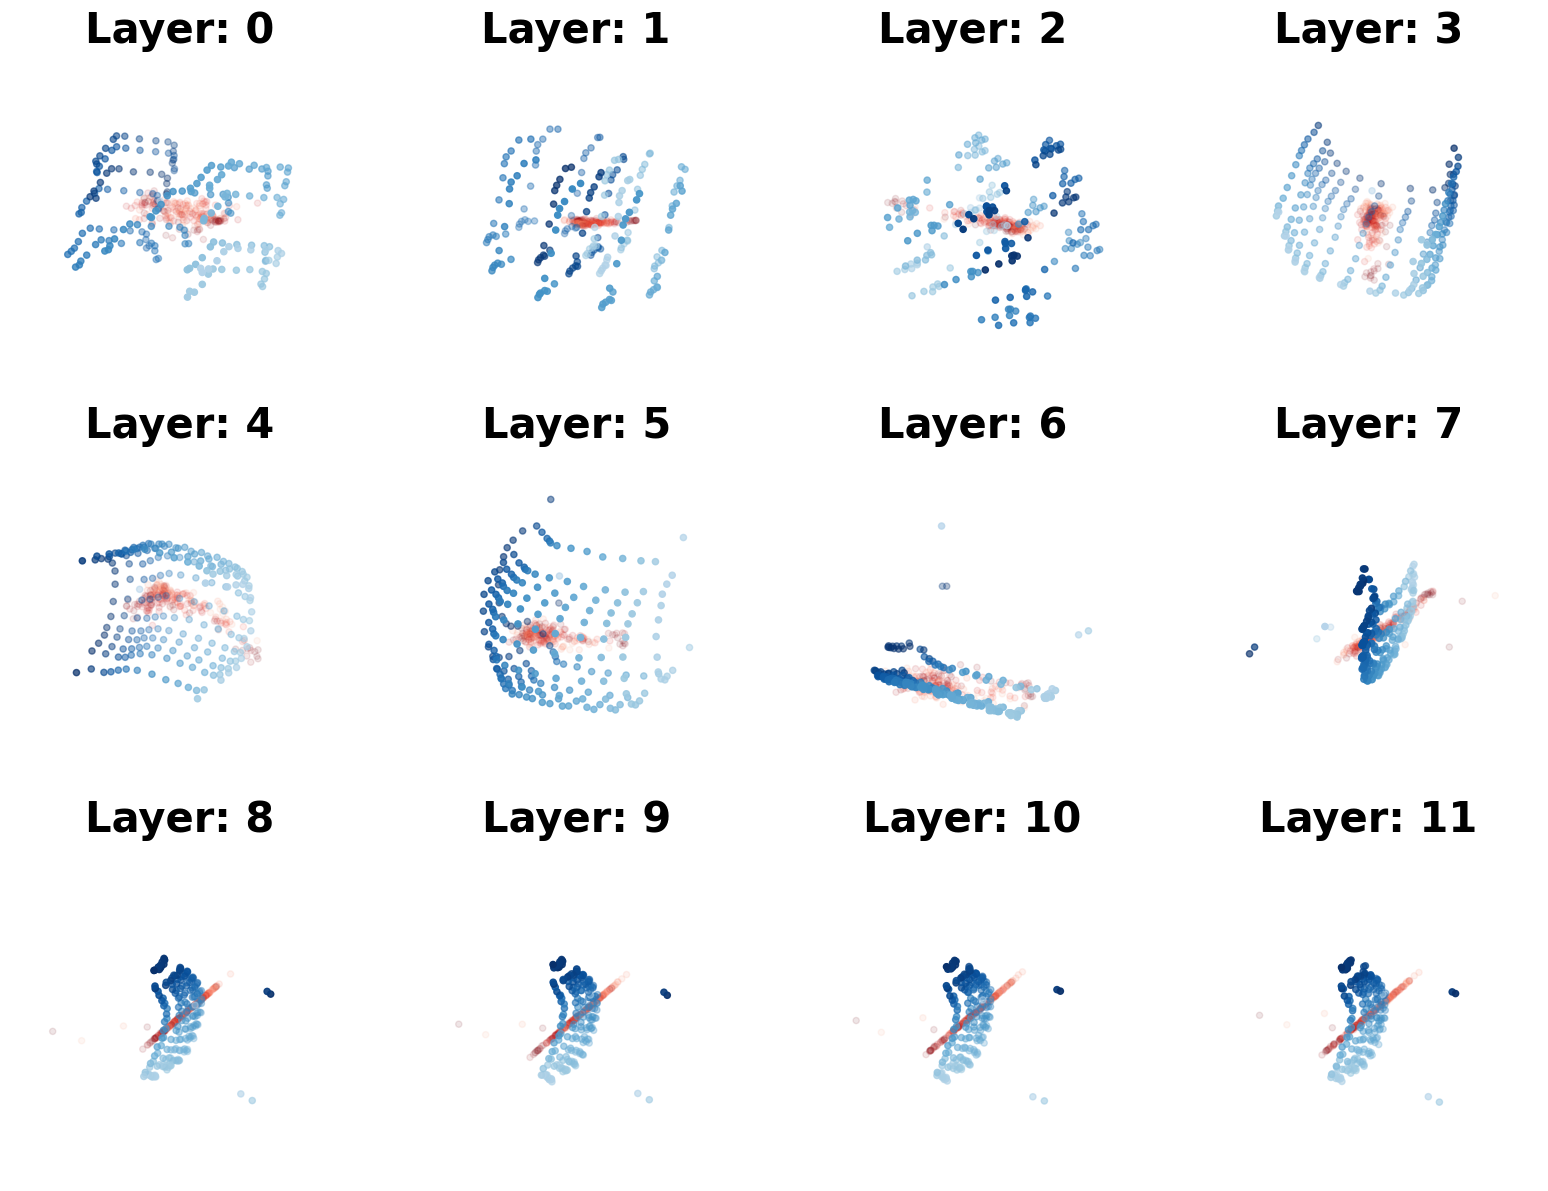

In [5]:
from utils import visz_pca_pos_cvec
visz_pca_pos_cvec.plot3(res['pos'].detach(),res['cvec'].detach().view(13,-1,192), plot_context=True)

Layer progress: 100%|██████████| 12/12 [00:00<00:00, 33.67it/s]


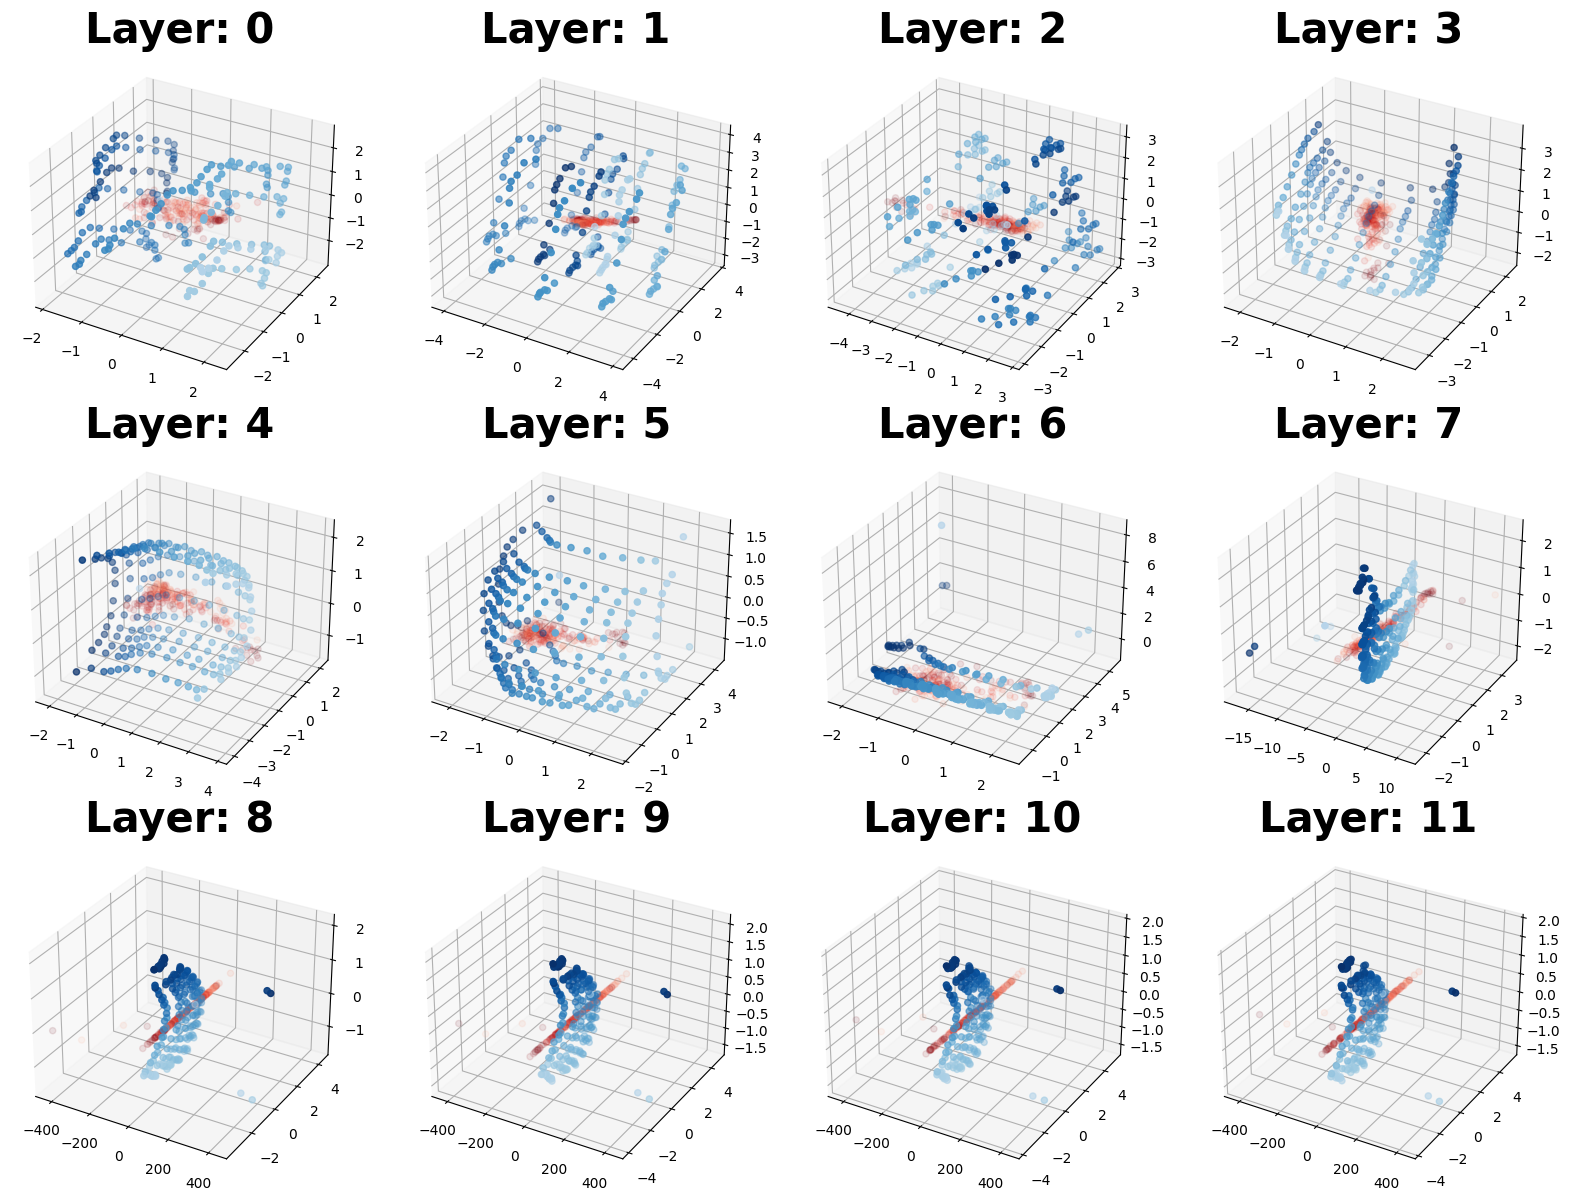

In [6]:
visz_pca_pos_cvec.plot3(res['pos'].detach(),res['cvec'].detach().view(13,-1,192), plot_context=True, remove_axis=False)

### Normalized Gram matrix

Layer Progress: 100%|██████████| 12/12 [00:07<00:00,  1.60it/s]


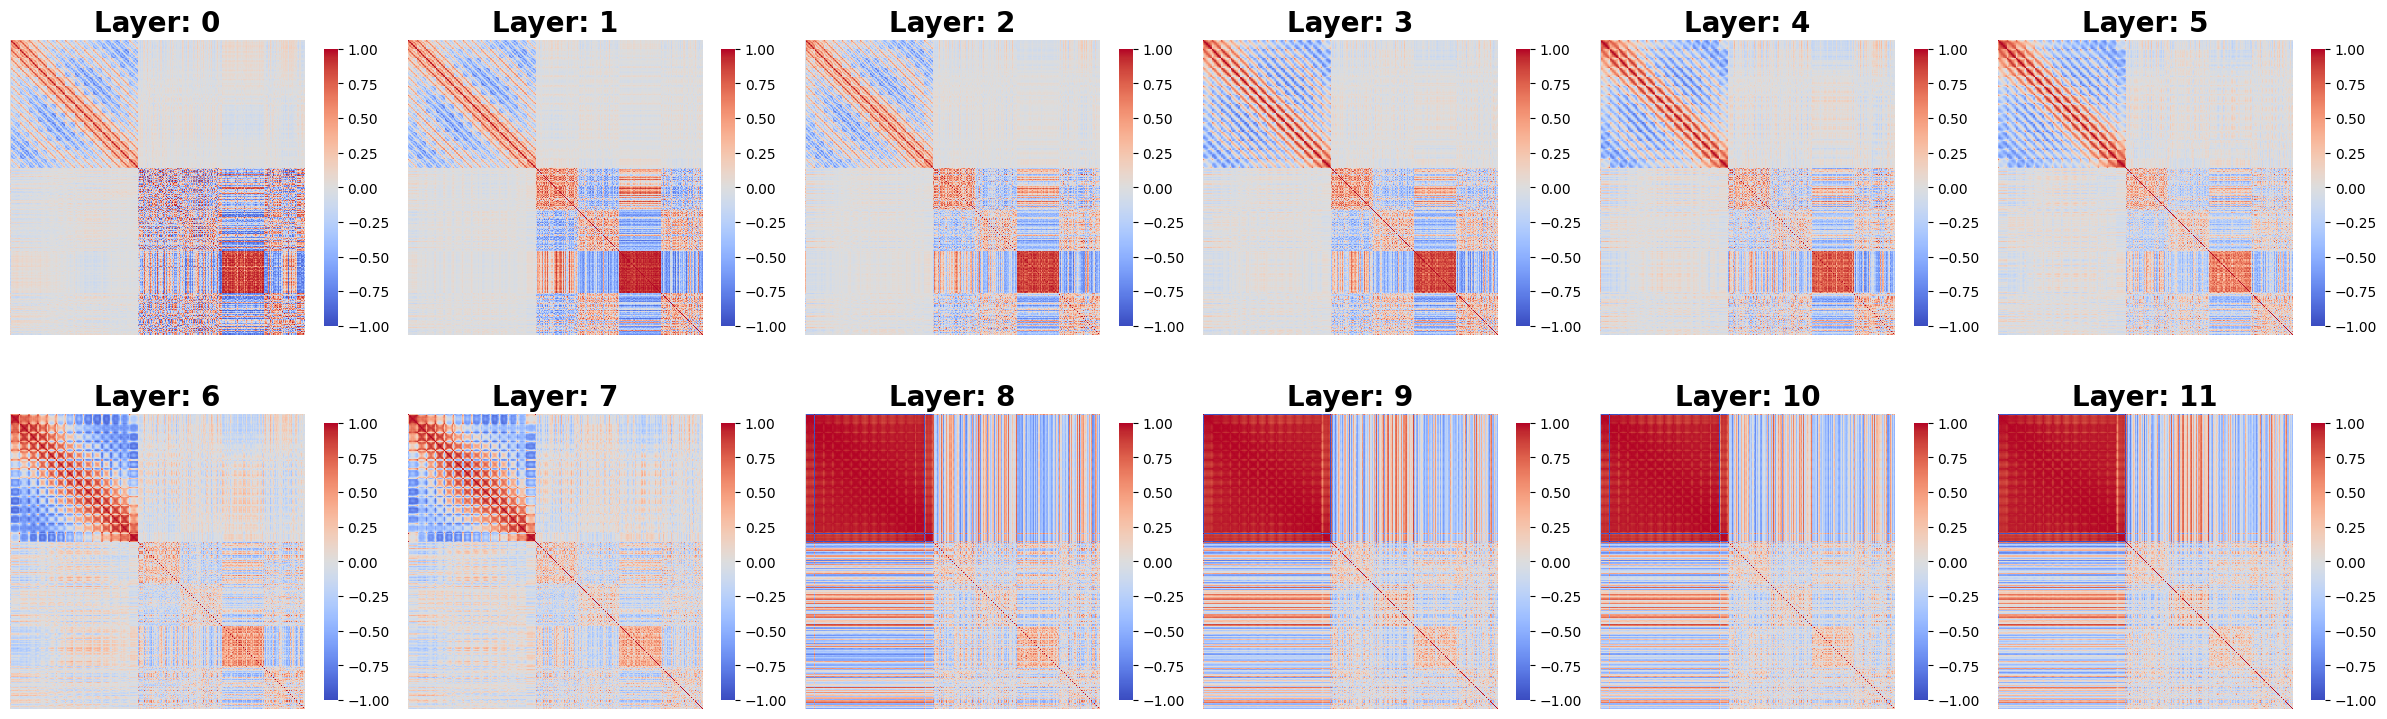

In [7]:
from utils import visz_gram_pos_cbasis
visz_gram_pos_cbasis.plot(res['pos'].detach(),res['ctx'].detach(),)# save_to= "output/figure2.pdf")

### singularvalues

In [10]:
res['pos'].detach().shape

torch.Size([13, 197, 192])

In [11]:
res['cvec'].detach().shape

torch.Size([13, 256, 197, 192])

In [12]:
res['cvec'].detach().view(13,-1,192).shape

torch.Size([13, 50432, 192])

Layer progress: 100%|██████████| 12/12 [00:00<00:00, 25.42it/s]


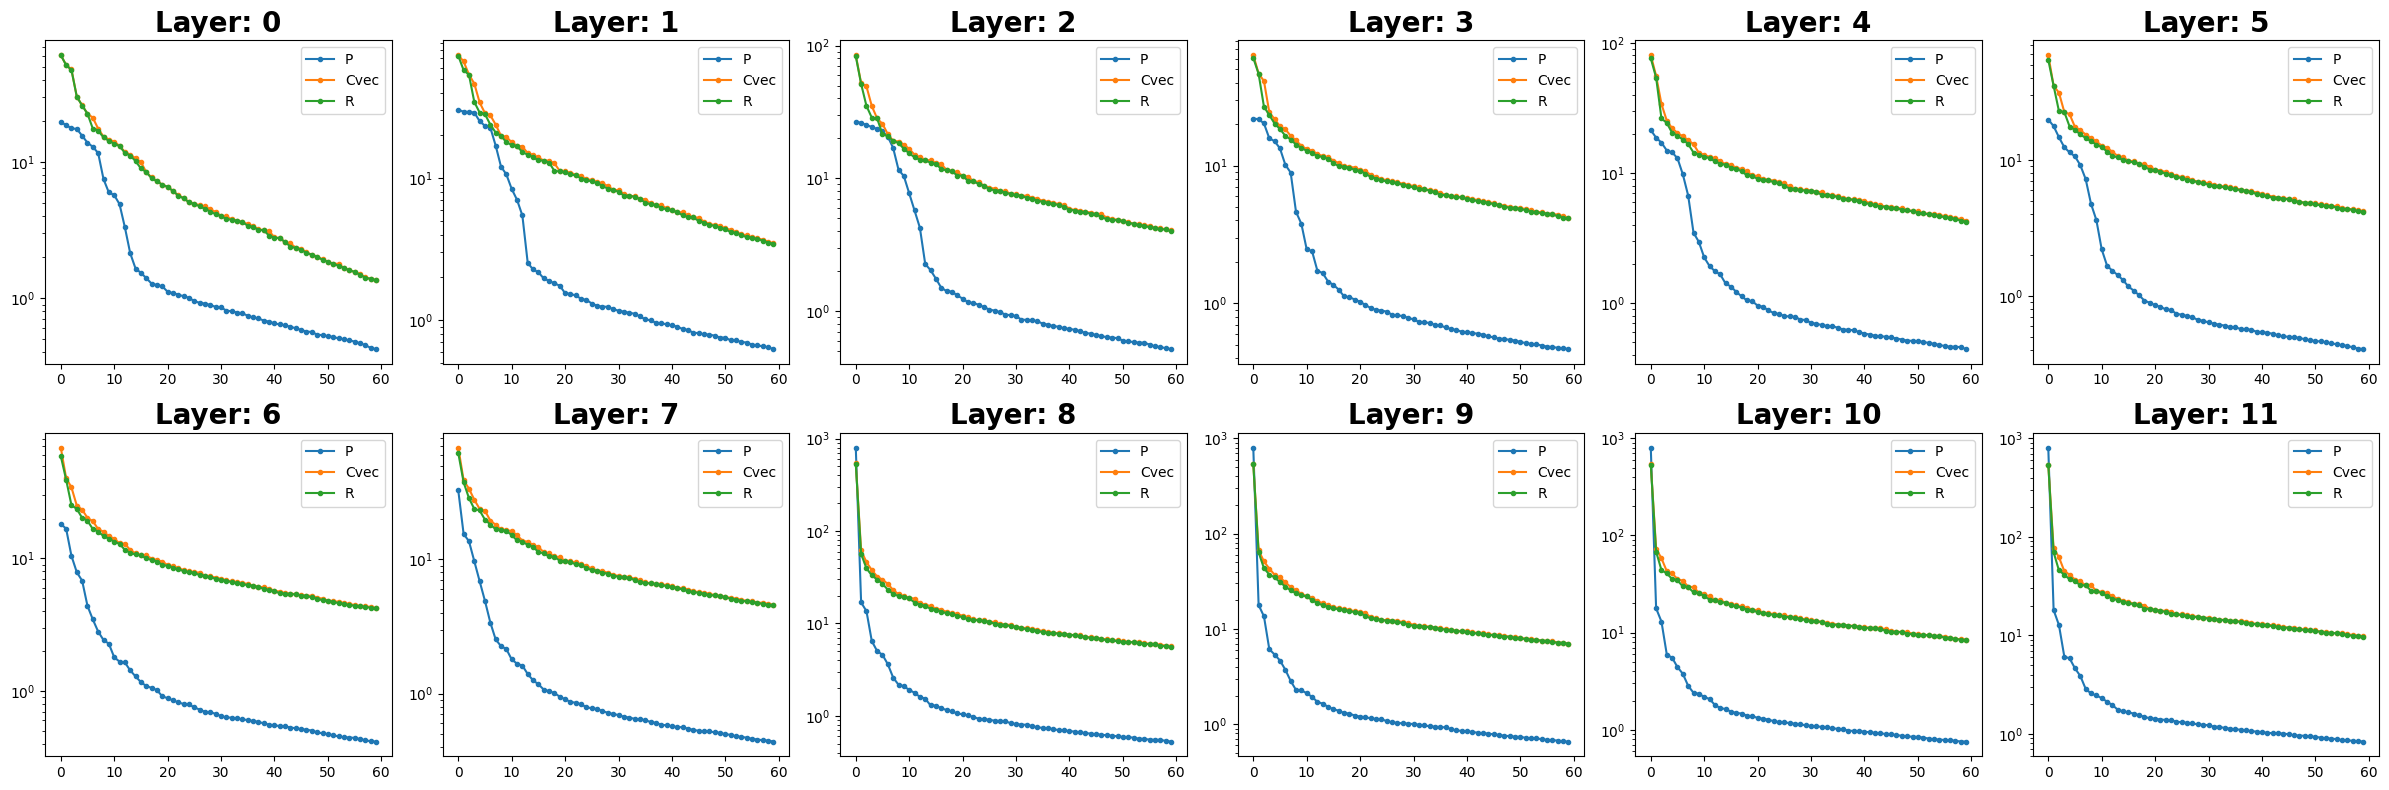

In [8]:
from utils import visz_svals_pos
visz_svals_pos.plot(res['pos'].detach(),res['cvec'].detach().view(13,-1,192),res['resid'].detach().view(13,-1,192))

In [10]:
L, T, C = res['pos'].detach().shape
L, S, C = res['cvec'].detach().view(13,-1,192).shape
nseq = S // T
nseq

256

In [10]:
res['cvec'].detach().view(13,-1,192).shape

torch.Size([13, 50432, 192])

### Fourier

Layer Progress`: 100%|██████████| 12/12 [00:04<00:00,  2.54it/s]


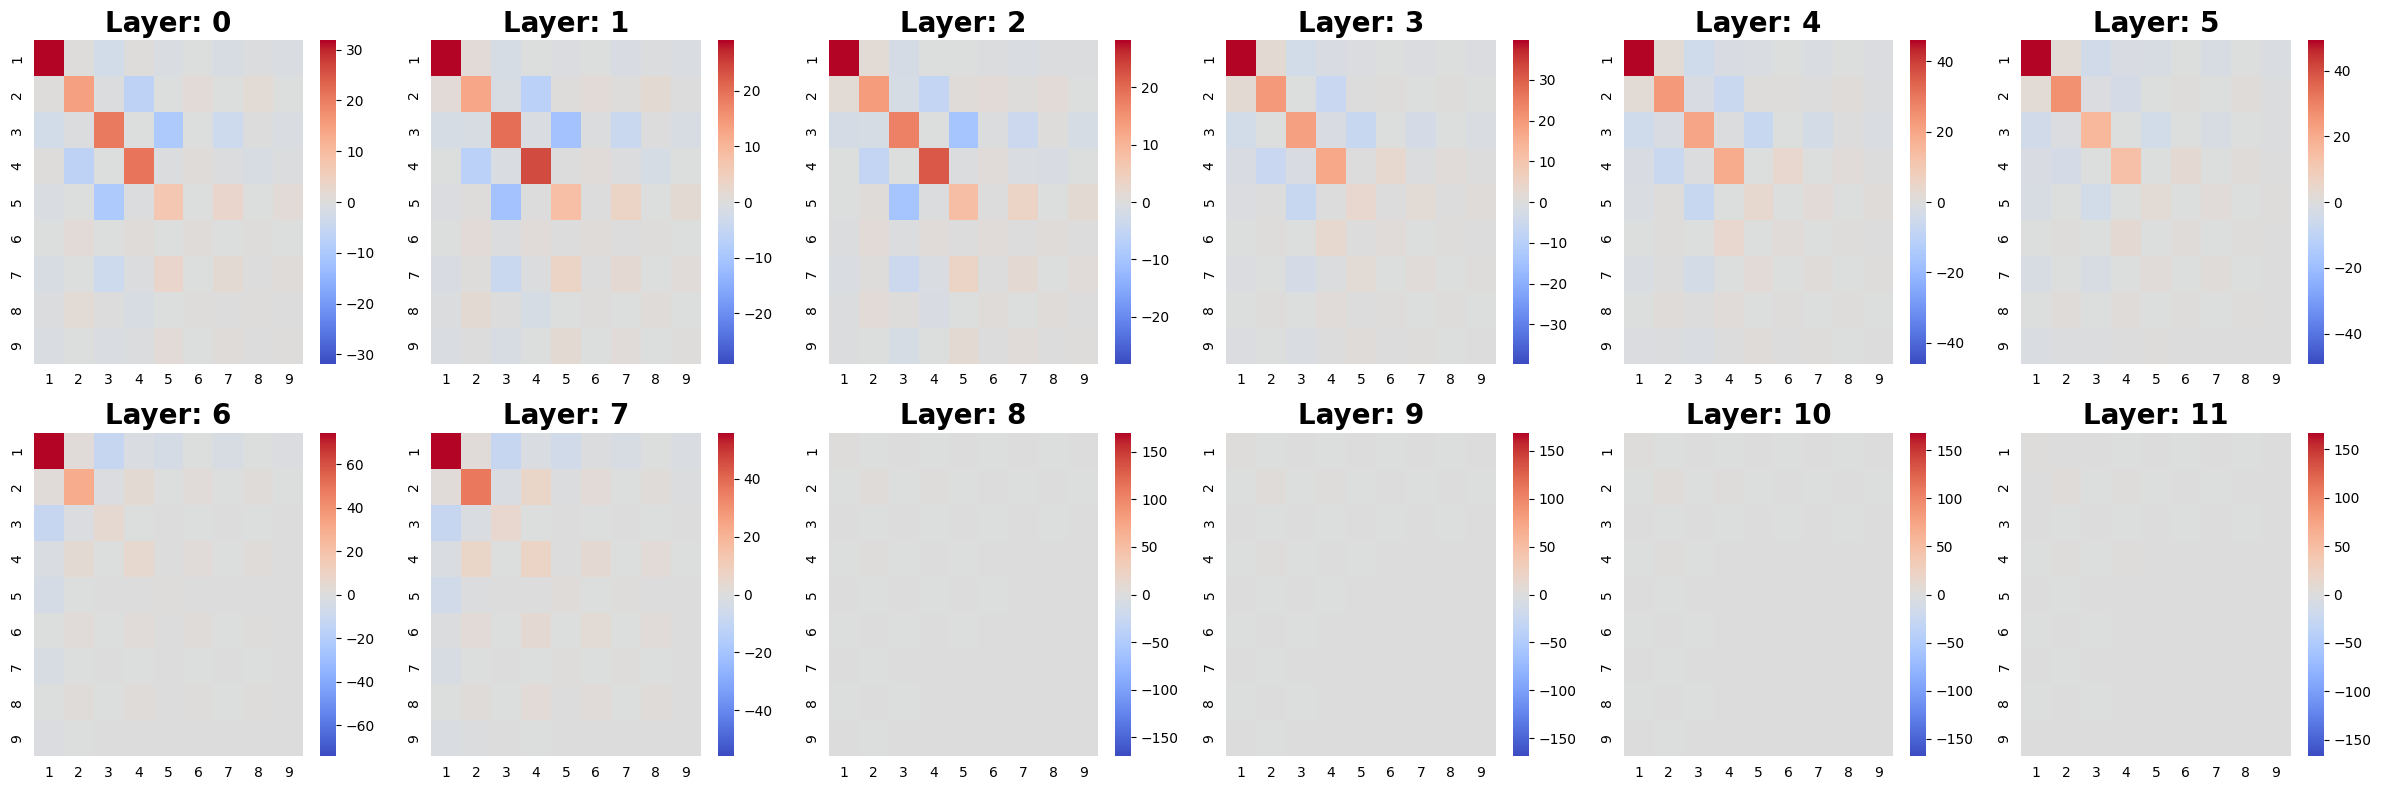

In [9]:
# right
from utils import visz_fourier_pos

visz_fourier_pos.plot(res['pos'].detach().numpy())

### attention weights

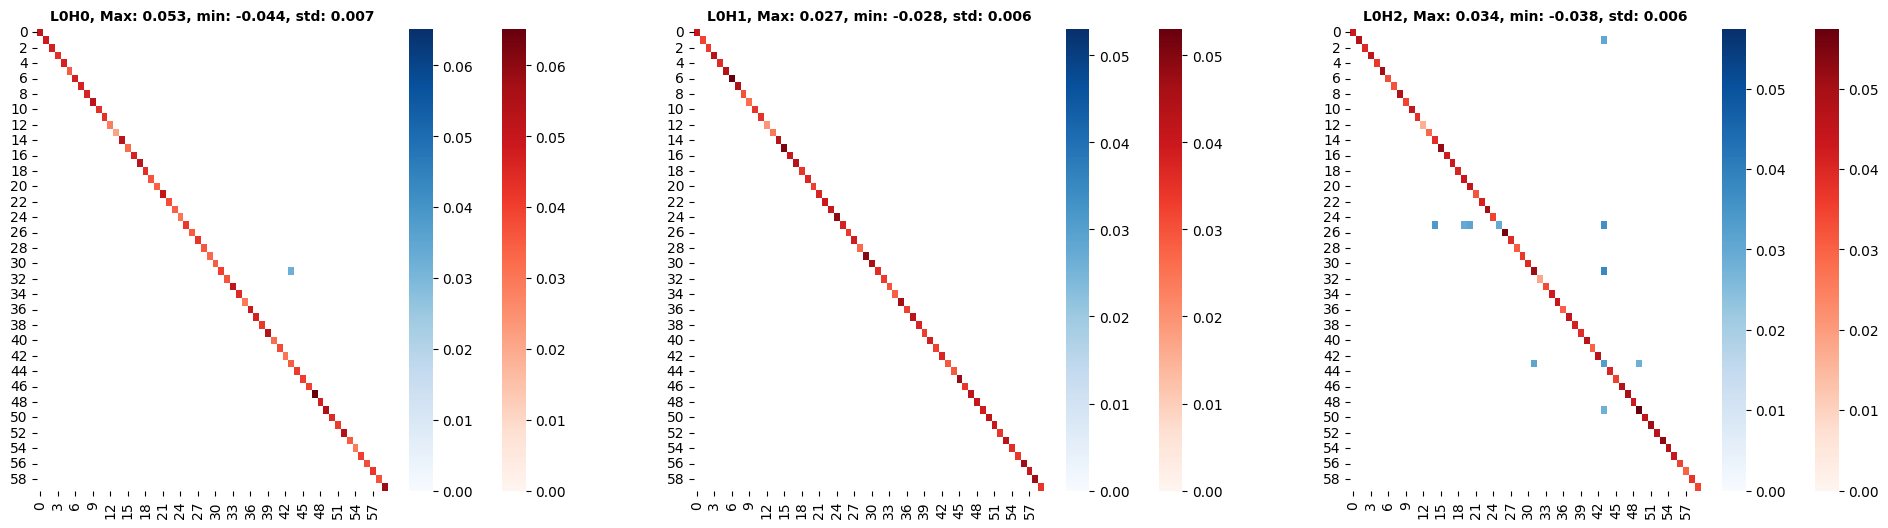

In [14]:
from utils import visz_att_weights_vit

visz_att_weights_vit.plot(0,res['pos'].detach())

In [11]:
C = 192

sigma_multiplier = np.sqrt(2 * np.log(C**2))/2  # denoising parameter
sigma_multiplier

2.292922888373654

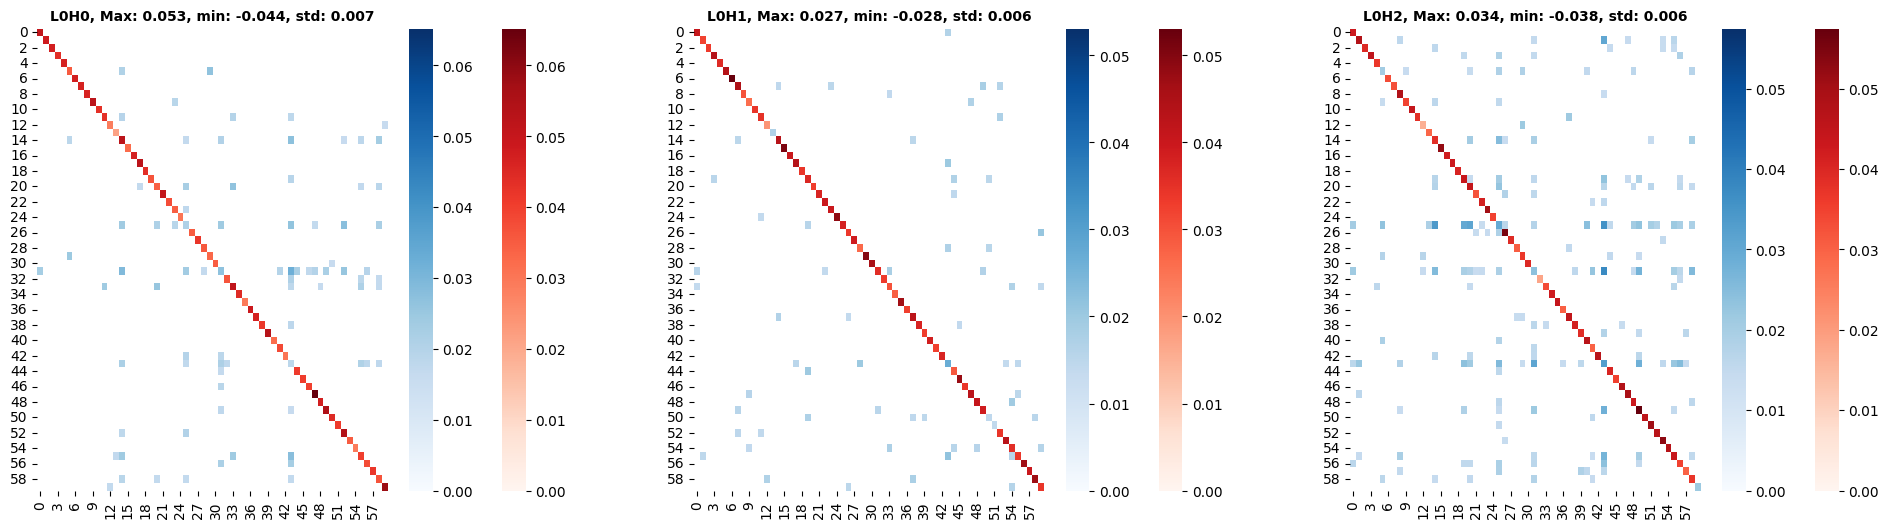

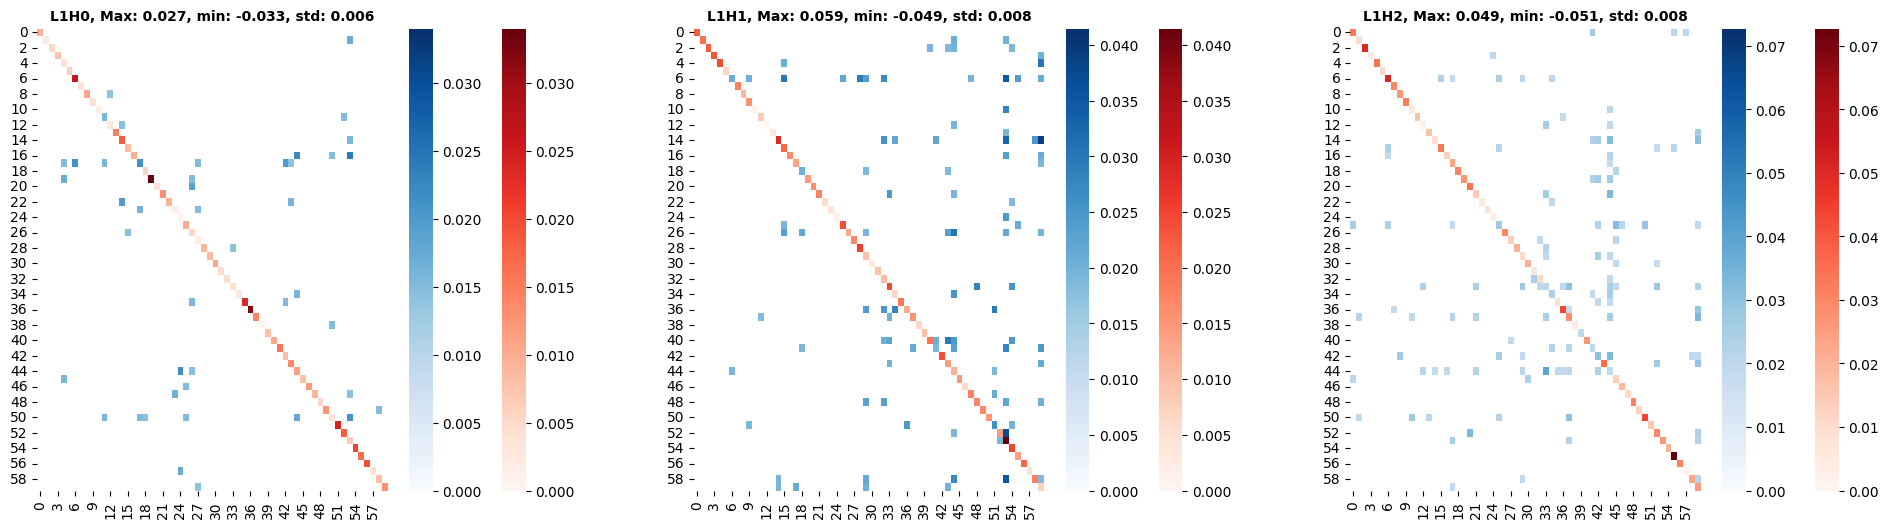

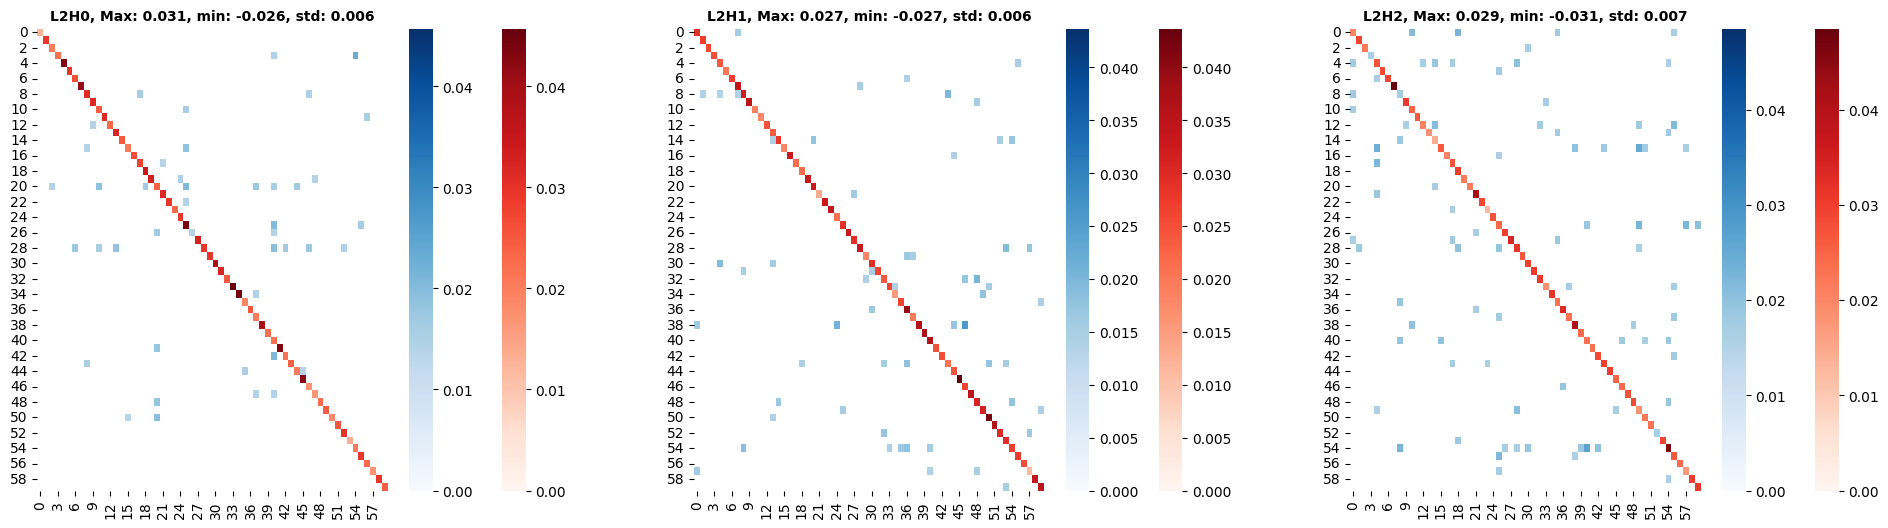

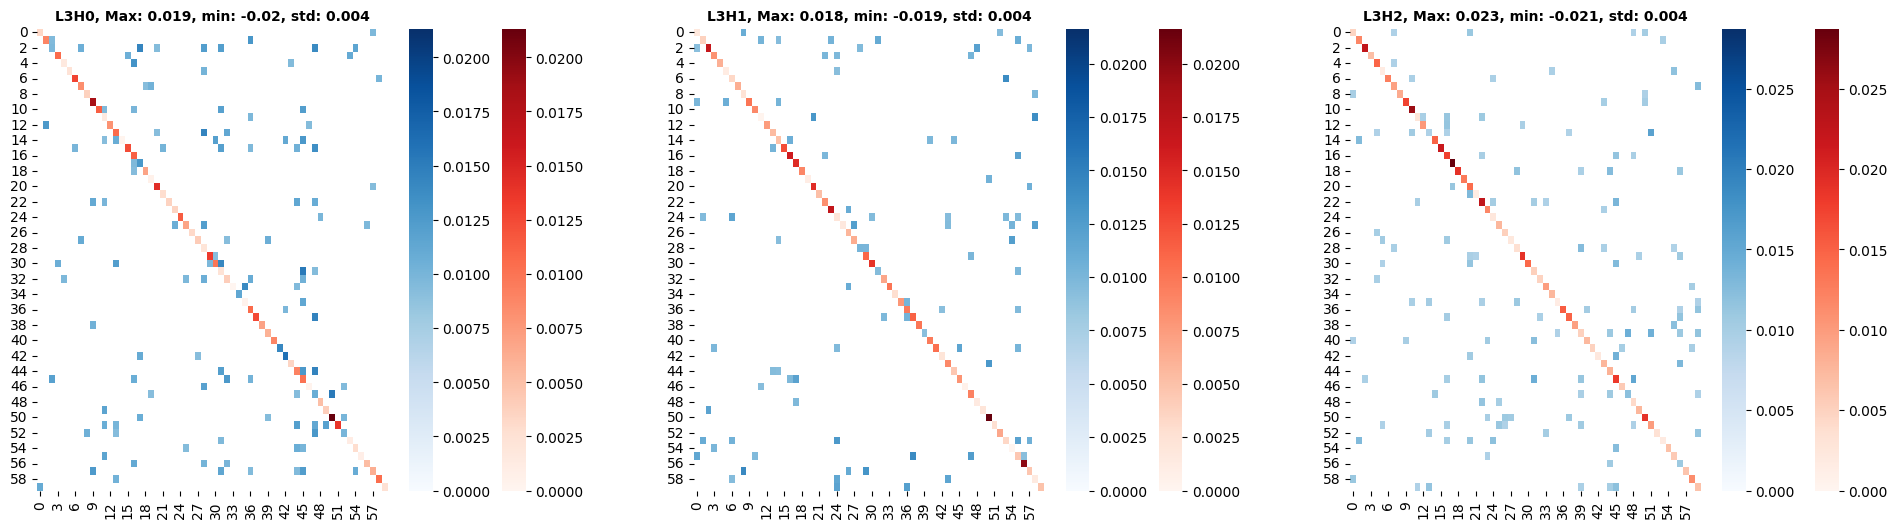

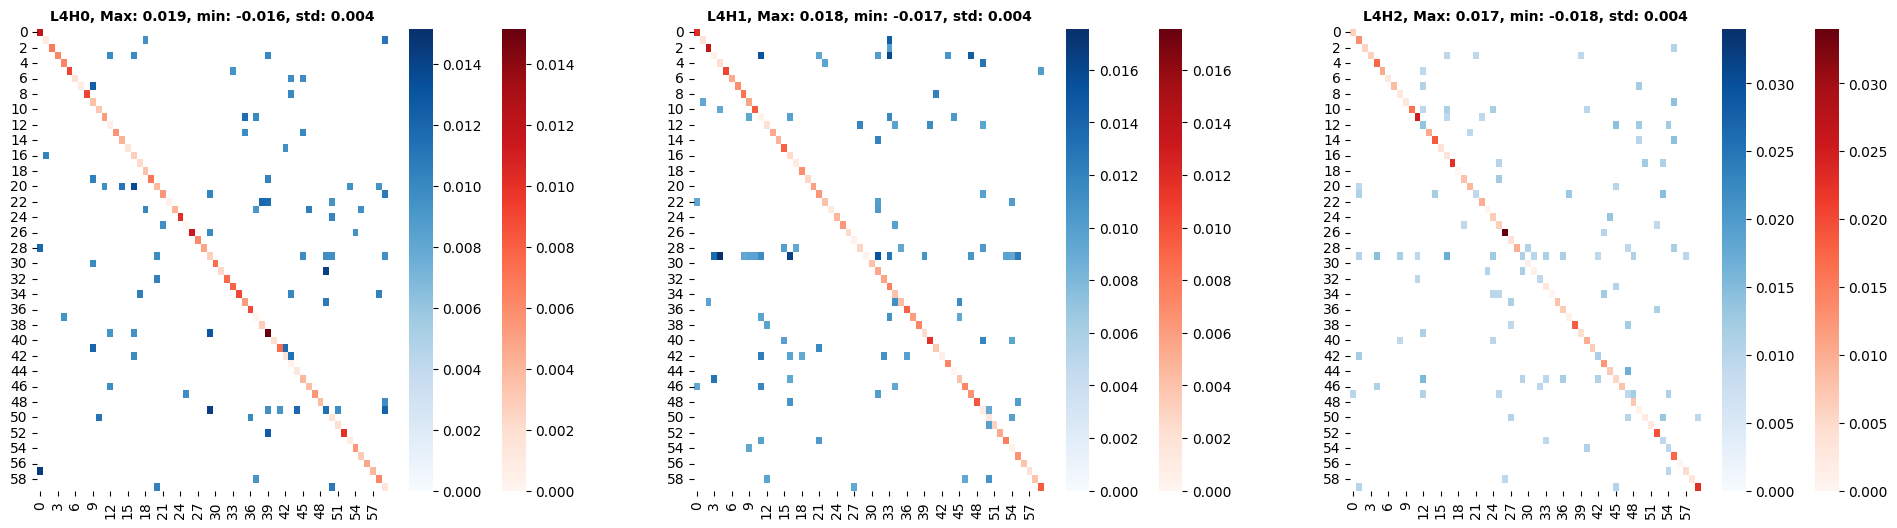

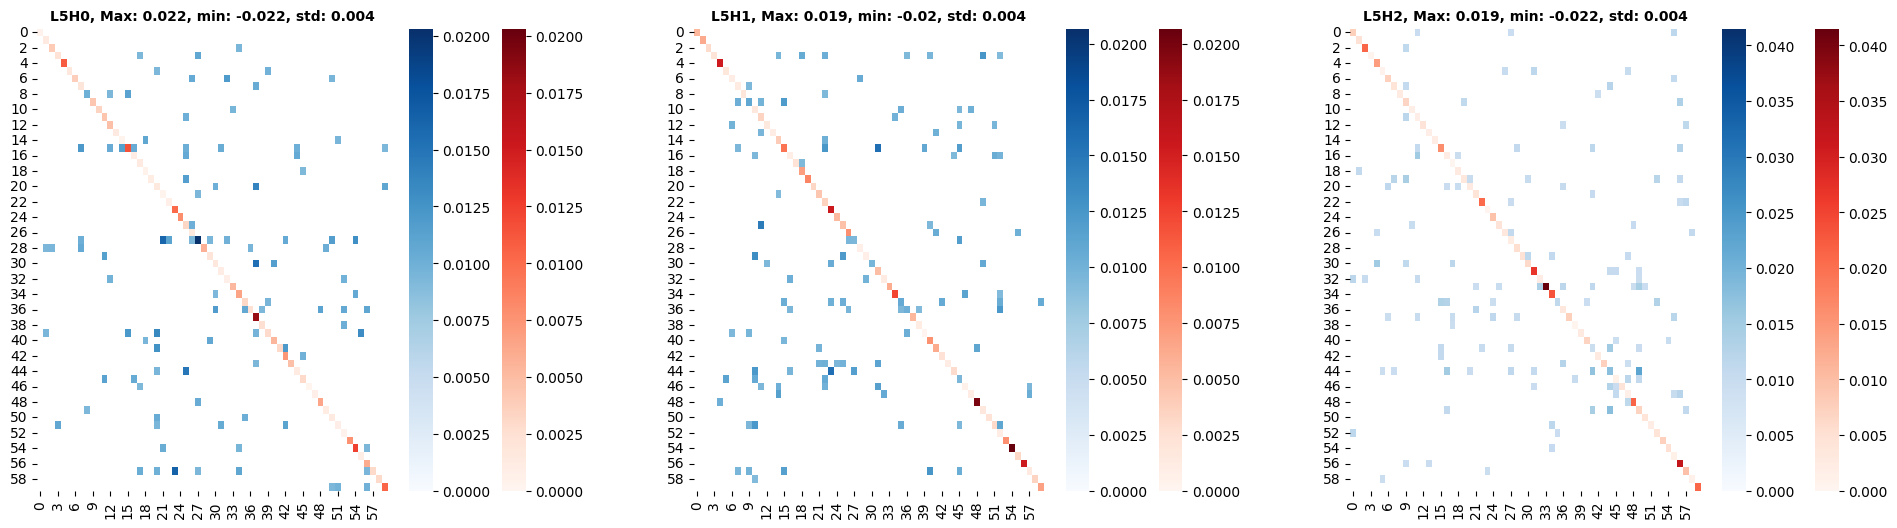

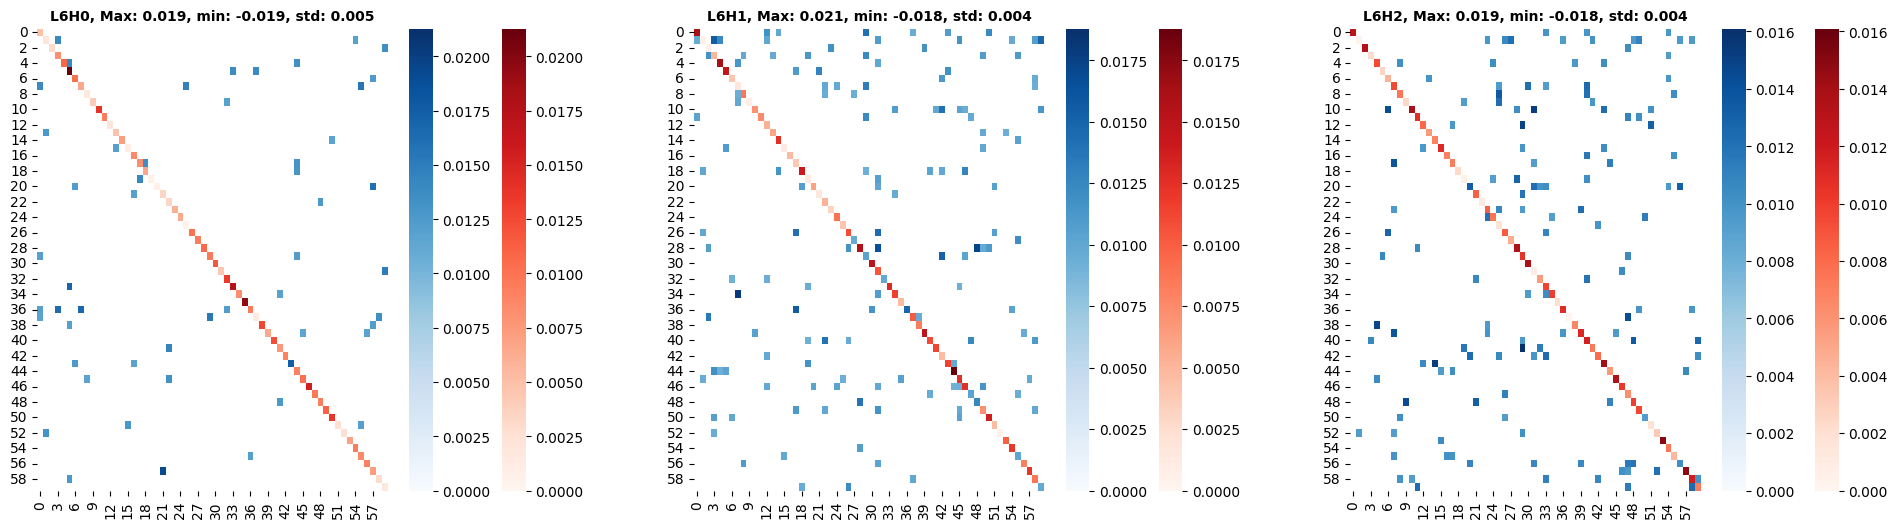

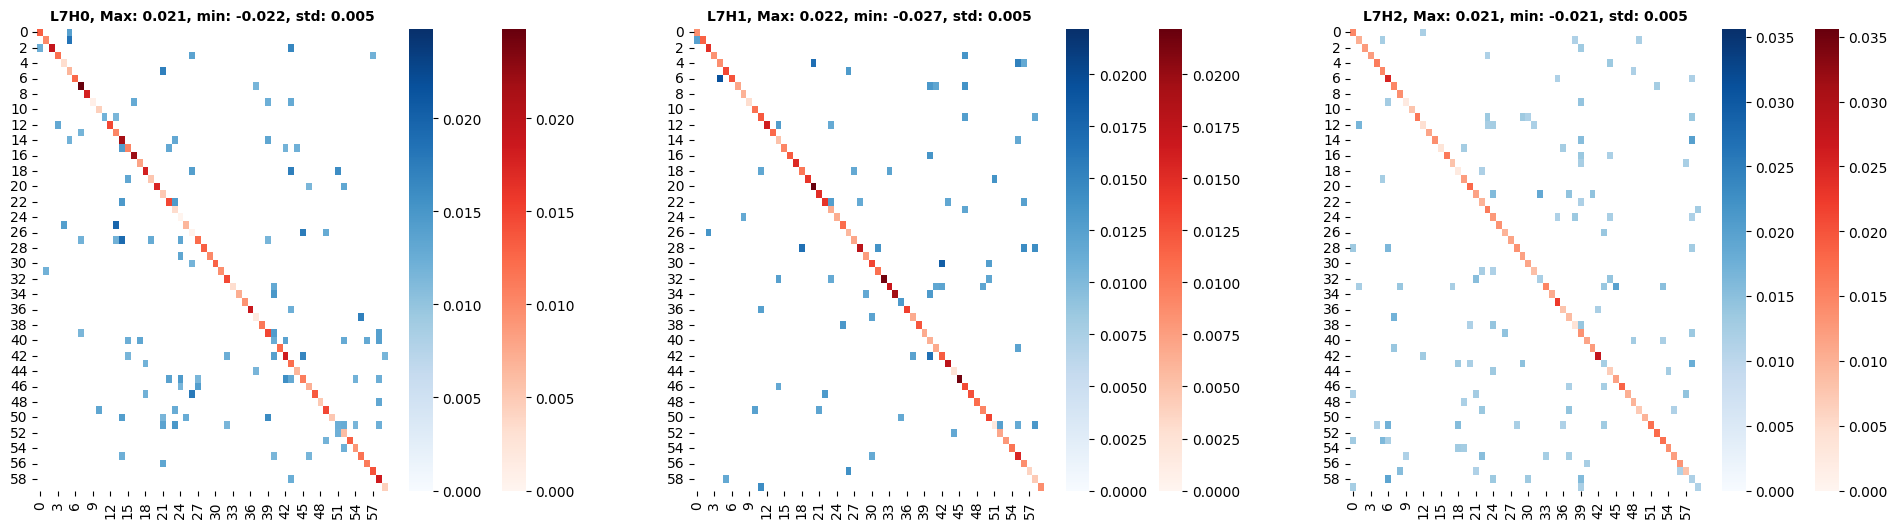

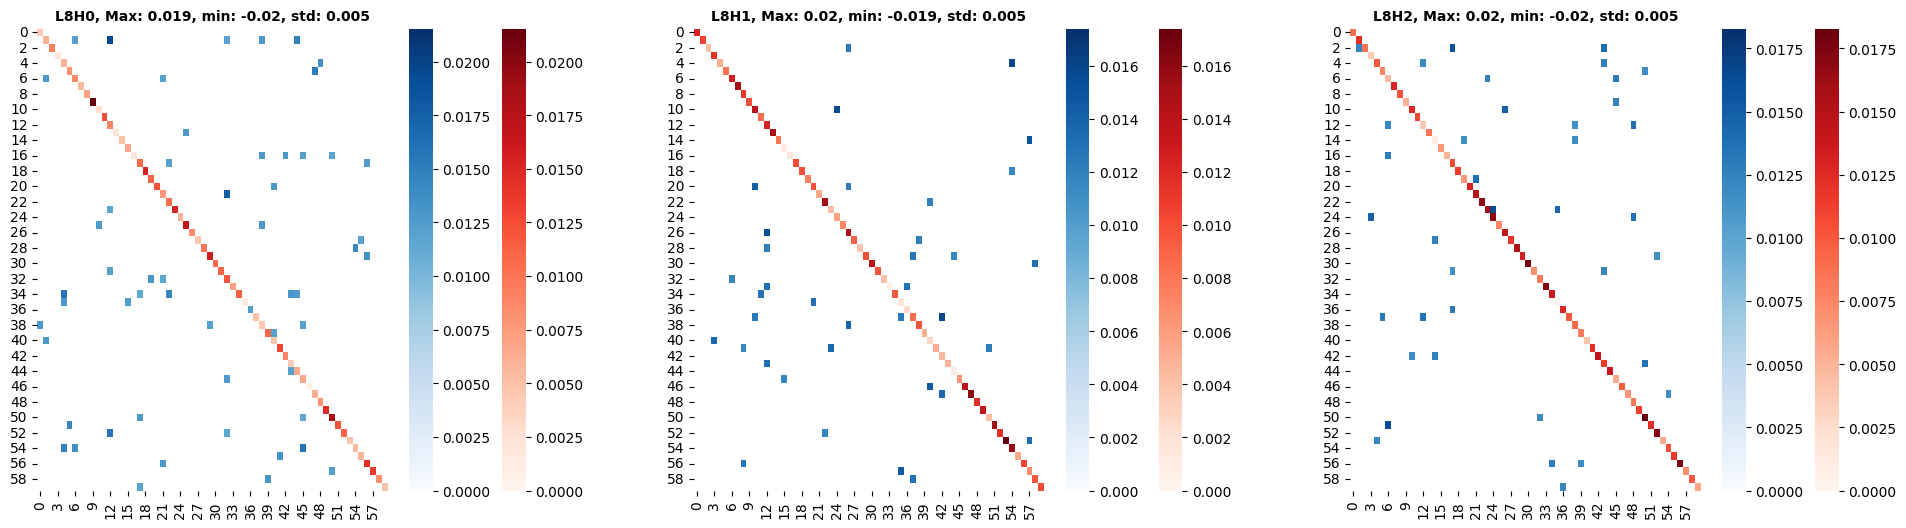

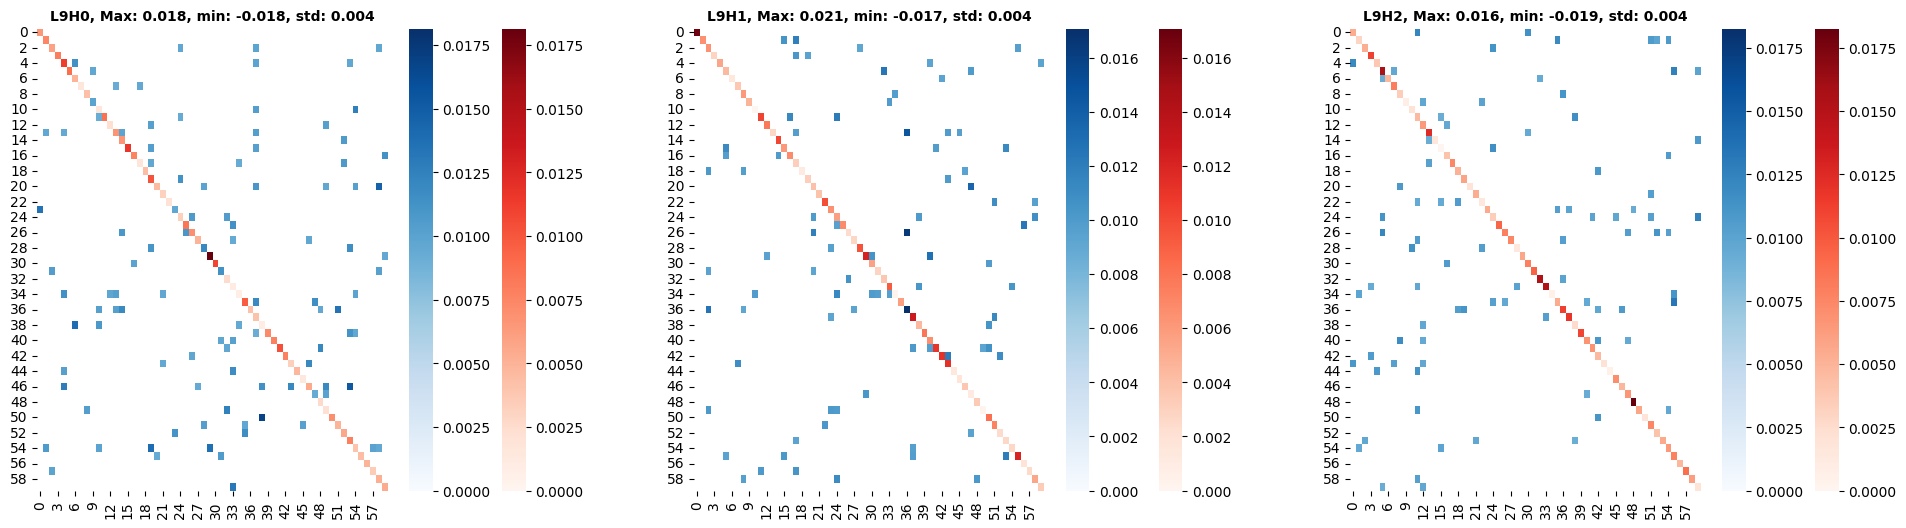

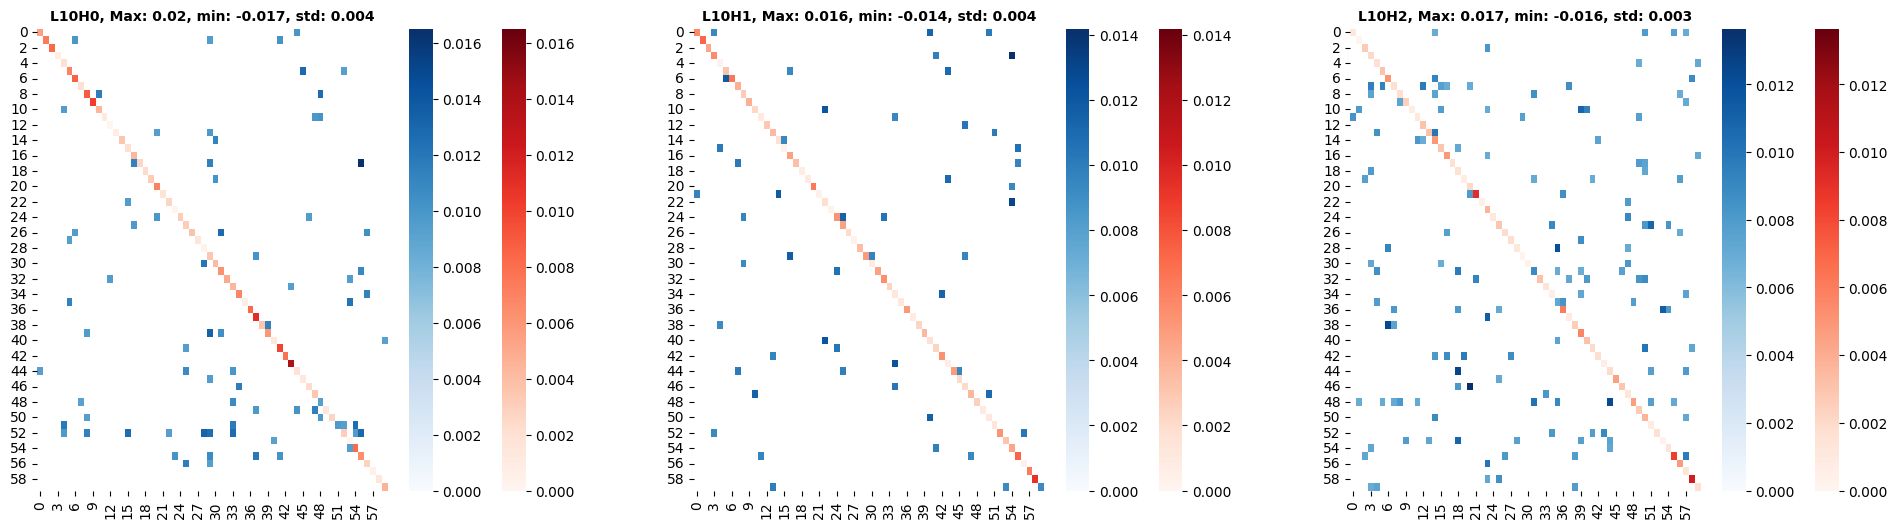

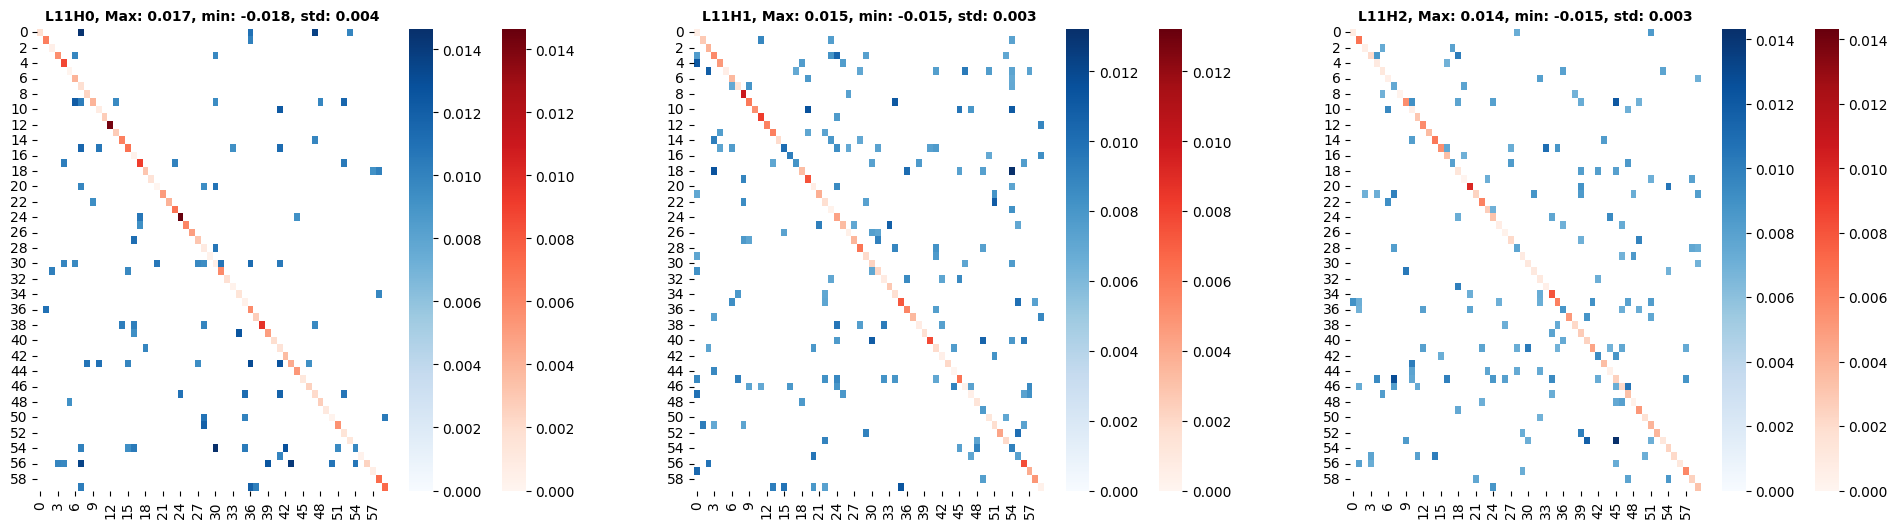

In [12]:
for i in range(12):
    visz_att_weights_vit.plot(i,res['pos'].detach(), sigma_multiplier = sigma_multiplier)